Name: Kai Chung, Ying

Course Name: CSC 594

Homework: #1

##Question1

In [1]:
#Step 1
#Load the input file to the ipython platform
with open("sample.txt","r") as f:
    #Separate the paragraphs by using "\n\n" separator and store in list
    para_lst = [line.strip("\n\n") for line in f]
#Eliminate all empty cells in the list    
para_lst = [item for item in para_lst  if len(item) != 0 ]

#Step 2
#Import the sent_tokenize function from nltk.tokenize library
from nltk.tokenize import sent_tokenize
#Initialize the sentences list
sent_lst = []
#Iterating the para_lst 
for line in para_lst:
    #Separate the sentences from paragraph by using sent_tokenize function
    for item in sent_tokenize(line):
        #Store sentences in the list
        sent_lst.append(item)

#Step 3        
#Initialize the word list
words_lst =[]
#Iterating the sentences list
for line in sent_lst:
    #Split the sentences into words and store into words list
    words_lst+=line.split()

#step 4
#Punctuation list is implmented
punc_lst=[".",'?',"[","]",";","#","!","@",",","$",
          "%","^","&","*","(",")","_","=","-",
          "\"",":","~","'","+",">","<","/","|","{","}"]

#Step 5
#Split the leading punctuation off the letters
idx=-1 #Initialize the index in punctuation = -1
i=0 #initialize the order of cell in the word list =0
lead_lst=[] #Initialize the leading list
#Iterating the word list generated above
for word in words_lst:
    word = word.strip()
    #If length of word =1, word straigtly save to new list
    if len(word)==1: 
        lead_lst += [word]
    else:
        #If the first characters in the word matches punctuation list
        if (word[i] in punc_lst):
            #Iterating the word until NO punctuation found in leading positions
            while True:
                try:
                    #Iterating word until length of word equal to 1
                    if len(word)==1:
                        lead_lst += [word] 
                        break
                    #Find the index of punctuation in the punctuation list
                    idx = punc_lst.index(word[i])
                    #Separate the punctuation from the parent word and add to the new list
                    lead_lst += punc_lst[idx]
                    #Parent word is restructured
                    word = word.replace(punc_lst[idx],"",1)
                except:
                    #If NO punctuation found, the words straightly save to new list
                    lead_lst += [word]
                    break #break the loop and check on other word in the list
        else:
            #Save single character word to the new list
            lead_lst+=[word]

            
#Step 6:  
##Split the trailing punctuation off the letters
idx=-1 #Initialize the index in punctuation = -1
i=0#initialize the order of cell in the word list =0
trail_lst=[]# initialize list for trail punctuation
#Iterating the leading word list generated above
for word in lead_lst:
    word=word.strip() #Strip off empty space off the word
    word= word[::-1] #flip the word 
    #If length of word =1, 
    if len(word)==1:
        #word is flipped back and save to new list
        trail_lst += [word[::-1]]
    else:
        if (word[i] in punc_lst):
            while True:
                try:
                    #Iterating word until length of word equal to 1
                    if len(word)==1:
                        trail_lst += [word] #Save to new list
                        break #break the loop and check on other word in the list
                    #Find the index of punctuation in the punctuation list
                    idx = punc_lst.index(word[i])
                    #Separate the punctuation from the parent word and add to the new list
                    trail_lst += punc_lst[idx]
                    #Parent word is restructured
                    word = word.replace(punc_lst[idx],"",1)
                except:
                    #If NO punctuation found, the words flip back and save to new list
                    trail_lst += [word[::-1]]
                    break #break the loop and check on other word in the list
        else:
            #Save single character word to the new list
            trail_lst+=[word[::-1]]

#Step 7
##Set up dictionary for special and contraction cases
#Special case dictionary
special_d ={}
special_d['i\'m']= "I am"
special_d['I\'m']= "I am"
special_d["won't"]= "will not"
special_d['Won\'t']= "Will not"
special_d['can\'t']= "can not"
special_d['Can\'t']= ["Can", "not"]

#"'s" case dictionary
s_d={}
s_d["he's"]="he is"
s_d["she's"]="she is"
s_d["it's"]="it is"
s_d["that's"]="that is"
s_d["there's"]="there is"
s_d["here's"]="here is"
s_d["He's"]="He is"
s_d["She's"]="She is"
s_d["It's"]="It is"
s_d["That's"]="That is"
s_d["There's"]="There is"
s_d["Here's"]="Here is"

#Other Contraction dictionary
ctr_d ={}
ctr_d["'ll"] = "will"
ctr_d["'ve"] = "have"
ctr_d["'d"] = "would"
ctr_d["'re"] = "are"
ctr_d["n't"] = "not"


#Step 8
##Split words with special and contraction cases
ctr_final_lst=[] #initialize the Contraction list
ctr_cnt=0 #Count how many transformation done 
for word in trail_lst:
    ctr_cnt=0
    #If length of word equals one straightly save in the new list 
    if len(word) ==1: 
        ctr_final_lst.append(word)
    else:
        sep_lst=[]
        #if word possess "'", it will go throught the iteration process
        if word.count("'")>0: 
            #if word in special dict, it will transform accordingly
            if word in special_d: 
                sep_lst = special_d[word].split()
                #If word matches to special dict, the matched part will be removed from parent word
                word=word.replace(word,"",1)
                ctr_cnt+=1
            #if word in "'s" dict, it will transform accordingly
            elif word in s_d:
                sep_lst = s_d[word].split()
                #If word matches to "'s" dict, the matched part will be removed from parent word
                word=word.replace(word,"",1)
                ctr_cnt+=1       
            else:
                #if word in other Contraction dict, it will transform accordingly
                for k,v in ctr_d.items(): #Iterate the keys of Contraction dict
                    #If word matches to Contraction dict, the matched part will be removed from parent word
                    if k in word: 
                        word = word.replace(k,"",1) 
                        sep_lst.append(v)
                        ctr_cnt+=1
                        
            #If the word is being identified matching to the dictionaries 
            if ctr_cnt>0:
                #new words and re-structured parent words are stored in the new list
                ctr_final_lst.append([word]+sep_lst)
                
            #Words NOT fall in Special , "'s" and Contraction dictionary
            if (len(sep_lst)==0) and ("'s" in word):
                #"'s" and parent word is split and store in the new list
                word = word.replace("'s","",1)
                ctr_final_lst.append([word]+ ["'s"])
        else:
            #Store the word including "'", but don't fall in any dictionaries
            ctr_final_lst.append(word)

#Step 9:
##Make sure all the elements in the list are string
final_lst_1=[] #initialize the final list 1
#Iterating the list from above
for item in ctr_final_lst:
    #If any cell in the list is in list format
    if type(item) == list:
        # items are in the list will be extracted out
        for w in item:
            #Store all items in the new list
            final_lst_1.append(w)
    else:
        final_lst_1.append(item)
        
#Step 10
## Eliminate all the empty cell in the list
final_lst_2=[] #initialize the final list 2
#iterating the list from above
for item in final_lst_1:
    #Elimating all the cells are empty.
    if item != "":
        #Save all the elements in the new list
        final_lst_2.append(item)

#print("Tokens: ",len(final_lst_2))

#Step 11
##Create the dict to store the tokens and theirs counts
word_count_dict={} #initialize the word count Dictionary
#Iterate the list from above
for word in final_lst_2:
    #If word exist in the dictionary, add +1 value to the key
    if word in word_count_dict: 
        word_count_dict[word] +=1
    else:
        #If word NOT exist in the dict, create key and add =1 value to the key
        word_count_dict[word] =1

#Step 12
#Sort the dictionary in Ascending order and store in a new list
word_count_lst = sorted(word_count_dict.items() 
                        , key= lambda item: (item[0])
                        , reverse=False)

#Step 13
##Write the counts to the output file
#Create and open the text file in the directory 
with open("csc594_hw1_output.txt", "w") as f:
    #Write strings to the text file in every new line
    #Write Number of paragraph
    f.write("# of Paragraph = %d\n"%(len(para_lst)))
    #Write Number of sentences
    f.write("# of sentence = %d\n"%len(sent_lst))
    #Write Number of tokens    
    f.write("# of tokens = %d\n"% sum(word_count_dict.values()))
    #Write Number of types    
    f.write("# of types = %d\n"% len(word_count_dict.keys()))
    f.write("===================================\n")
f.close() #Close the output file


#Step 14
##Write the sorting tokens and theirs values to the output files
#Re-open the output file 
with open("csc594_hw1_Output.txt", "a") as f:
    #Find the maximum count of tokens before iteration
    count = max(word_count_dict.values())
    while count>0: #Iteration runs as long as count >0
        #Iterating the word count list above
        for i in range(len(word_count_lst)):
            #if the tokens' value match the count
            if word_count_lst[i][1] == count:
                #write the token and value to the output file
                f.write("%s %d\n" % (word_count_lst[i][0], word_count_lst[i][1]))
        count-=1 #Decrement of count
f.close() #Close the output file

print("Done!!!")

Done!!!


##Extra Credit

Generate WordCloud

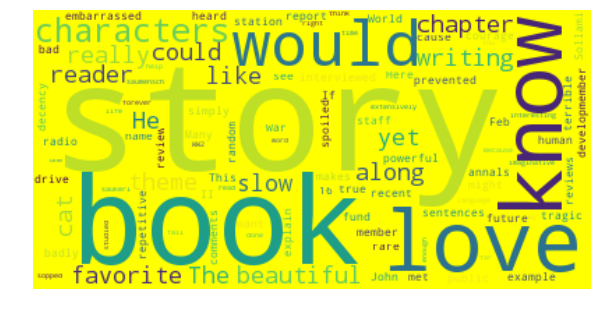

Done!!!


In [6]:
#Copy dictionary to in dict (d_cloud1, d_cloud2)
d_cloud1 = word_count_dict.copy()
d_cloud2 = word_count_dict.copy()

#Read the stop word document and store the stop words in list (i.e. stop_word_lst)
with open("EnglishStopwords.txt", "r") as f:
    stop_word_lst = [word.replace("\n","") for word in f]

#Iterating the word list
for k,v in d_cloud1.items():
    #If key is stop word, delete the key from the dict
    if k in stop_word_lst:
        del(d_cloud2[k])
        continue #Quit the iteration loop
    #If the length of key is 1, delete the key
    if len(k) == 1:
        del(d_cloud2[k])
        continue #Quit the iteration loop
    #If keys include one-letter non-alphanumeric symbols, delete the key
    for punc in punc_lst:
        if (punc in k):
            del(d_cloud2[k])
            continue #Quit the iteration loop

#Import the wordcloud library and function
from wordcloud import WordCloud
#Import matplotlib libaray
import matplotlib.pyplot as plt
%matplotlib inline

#Plot the WordCloud from the new dict            
plt.figure(figsize=(10,10))
#Generate the WordCloud Graph for Cluster 1
wordcloud = WordCloud(#width=100
                      #,height=50
                      max_words=100
                      ,relative_scaling=1
                      ,normalize_plurals=True
                      ,background_color='yellow').generate_from_frequencies(d_cloud2)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

#Export the figure in png format
#ave the figure in the same directory as the program file
plt.savefig('csc594_hw1_extra_wc.png')
plt.show()

print("Done!!!")